In [4]:
import os
import math
import numpy as np
from itertools import islice
path='D:\dataset\self_driving_data'
train_file=os.path.join(path,'data.txt')

split=0.8
y=[]
try:
    f=open(train_file)
    for line in f.readlines():
        t1,t2=line.split(',')
        image,angle=t1.strip().split()
        #converting the angle into radian
        y.append((float(angle)*math.pi)/180)
    y=np.array(y)
    print("completed preprocessing data.txt")
    
    split_index=int(len(y)*split)
    train_y=y[:split_index]
    test_y=y[split_index:]
except:
    print('file not found')
finally:
    f.close()


completed preprocessing data.txt


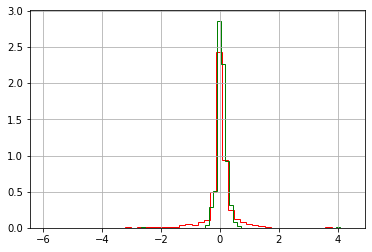

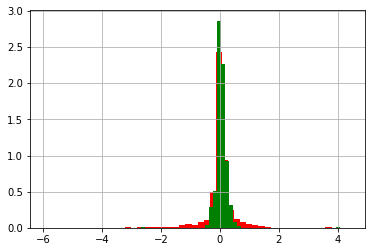

In [5]:
#now we are seeing the relationship among trian and test datasets
import matplotlib.pyplot as plt
plt.hist(train_y,bins=50,color='red',density=True,histtype='step')
plt.hist(test_y,bins=50,color='green',density=True,histtype='step')
plt.grid()
plt.show()

plt.hist(train_y,bins=50,color='red',density=True)
plt.hist(test_y,bins=50,color='green',density=True)
plt.grid()
plt.show()

In [6]:
#base model by using y_pred=mean(y) or 0 because most of the values is close to zero
train_mean_y=np.mean(train_y)
print("Test mean square error : %f" %np.mean(np.square(test_y-train_mean_y)))

#if we take pred=0
print("Test mean square error : %f" %np.mean(np.square(test_y-0.0)))
#this means that our model accuracy should be greather than 91% beacuse our base model have accuracy 91%

Test mean square error : 0.090517
Test mean square error : 0.091768


In [9]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import cv2

In [20]:
def load_data():
    dir_="D:\dataset\self_driving_data\data"
    training_data=[]
    length=200 ; breadth=66
    for img in os.listdir(dir_):
        img_array=cv2.imread(os.path.join(dir_,img))
        new_array=cv2.resize(img_array,(length,breadth))
        training_data.append(new_array)
    return training_data
training_data=load_data()
    

In [26]:
#converting the list array into numpy array
X=np.array(training_data).reshape(-1,200,66,3)

In [ ]:
X=X/255.0
x_train=X[:split_index]
x_train=X[split_index:]
print("shape of x_train : ",x_train.shape)
print("shape of x_test : ",x_test.shape)

In [28]:
import pickle 
pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()